# Visualizing The Gender Gap in College Degrees
**Is there a gender gap in college degrees?**

[The Department of Education Statistics](https://www2.ed.gov/rschstat/landing.jhtml?src=ft) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

In this project, we are going use Randal Olson's data set to visualize percentage of bachelor's degrees granted to women from 1970 to 2012.
Our purpose is to determine whether gender gap in college degrees exist.

**Setting Up The Environment**

In [1]:
# Importing libraries into the environment 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

**Reading and Exploring**

In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees[:3] #Displaying first 3 rows to inspect dataframe

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1


We now have a table of information that contains different degrees and the number of women graduates from that year.

We are now going to group the different degrees into degree categories. The 3 categories will be STEM Degrees, Liberal Art Degrees and Other Degrees.

# Categorizing Degrees

In [3]:
#Creating 3 different lists of the data. Using column name
stem_cats = ['Psychology', 'Biology', 'Math and Statistics',
             'Physical Sciences', 'Computer Science', 'Engineering']

lib_arts_cats = ['Foreign Languages', 'English', 
                 'Communications and Journalism',
                 'Art and Performance', 'Social Sciences and History']

other_cats = ['Health Professions', 'Public Administration',
              'Education', 'Agriculture','Business', 'Architecture']

# Making a list of lists of the categories to use later to make a DataFram to visually inspect
cats = [stem_cats,lib_arts_cats,other_cats]

#Creating Dataframe so I can visually inspect the table to make code
cat_DF = pd.DataFrame([pd.Series(value) for value in cats])
cat_DF.transpose() #Transposing the table to be vertical

,0,1,2
0,Psychology,Foreign Languages,Health Professions
1,Biology,English,Public Administration
2,Math and Statistics,Communications and Journalism,Education
3,Physical Sciences,Art and Performance,Agriculture
4,Computer Science,Social Sciences and History,Business
5,Engineering,NaN,Architecture


# Plotting the number of graduates of women, each year per degree

Since there will be many plots together, and we will be comparing female graduates to male graduates, we need need line colors that everyone will see. We will therefore us colors that are colorblind friendly. These will be **light blue** and **light orange**.

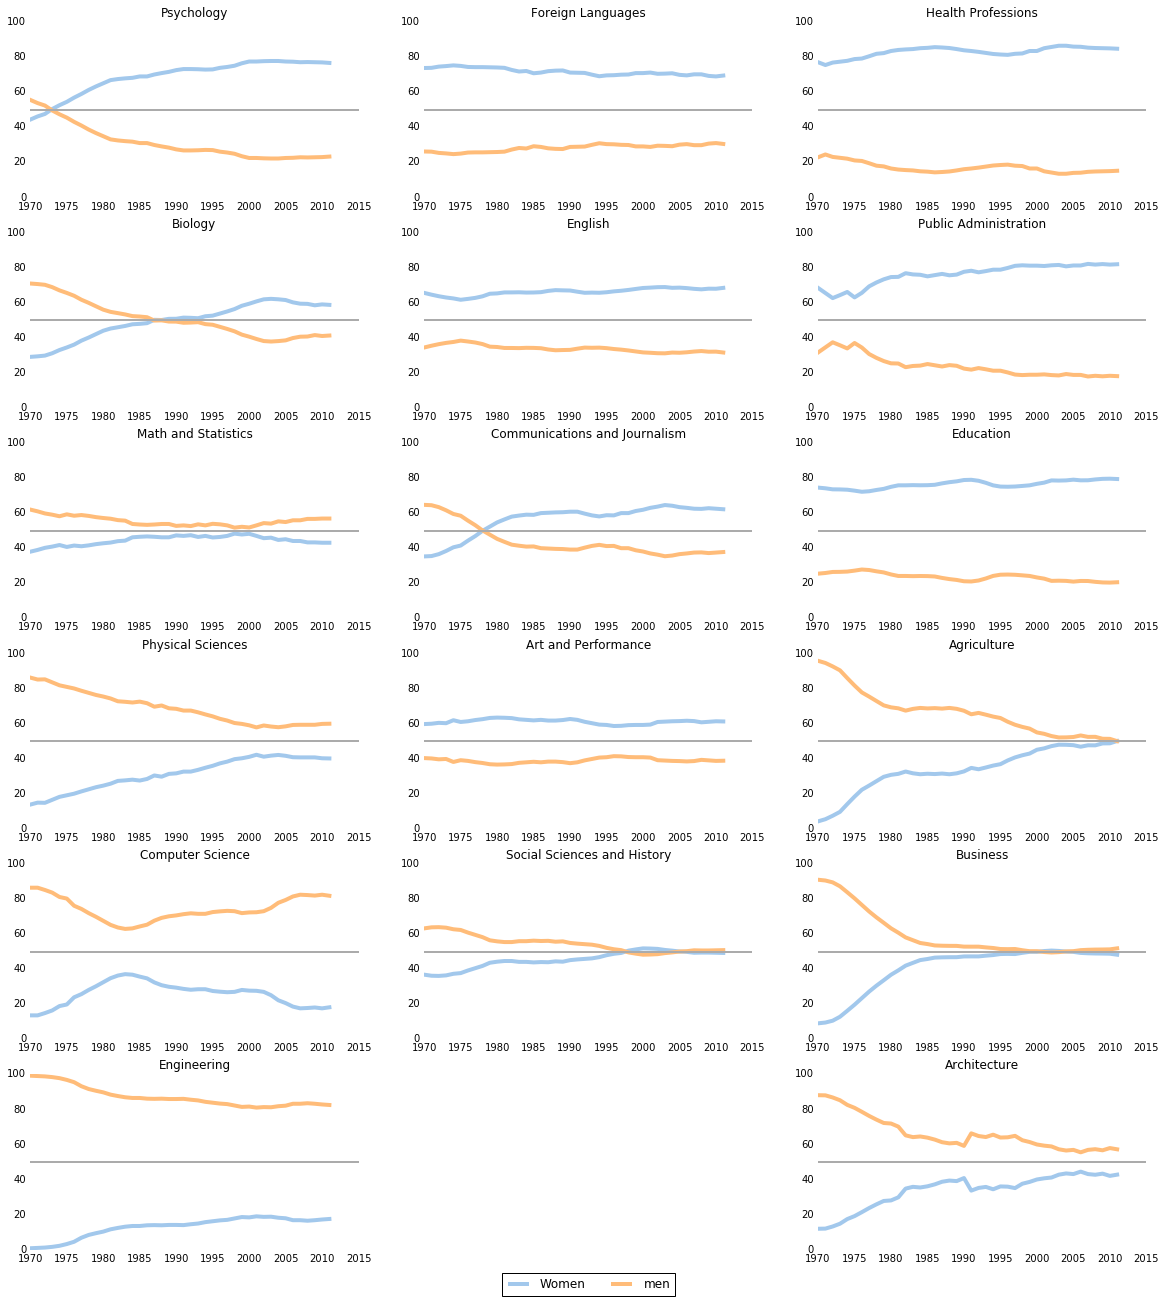

In [4]:
#using colorblind friendly colors
cb_light_blue = (162/255, 200/255, 236/255)
cb_light_orange = (255/255, 188/255, 121/255)

fig = plt.figure(figsize=(20,22))

for i in range(3):
    for j in range(len(cats[i])):
        ax = fig.add_subplot(6,3,3*j+i+1)
        ax.plot(women_degrees['Year'],women_degrees[cats[i][j]],
                label='Women', c=cb_light_blue, linewidth=4)
        
        #Find men degrees by subtracting % of women degrees from 100
        ax.plot(women_degrees['Year'], 100 - women_degrees[cats[i][j]],
               label='men', c=cb_light_orange, linewidth=4)
        ax.set_title(cats[i][j])
        
        #removing spines of all plots
        for key, spine in ax.spines.items():
            spine.set_visible(False)
            
        ax.tick_params(bottom='off',top='off',left='off',right='off')
        ax.set_xlim(1970,2015)
        ax.set_ylim(0,100)
        ax.axhline(50, c=(171/255, 171/255, 171/255), lw=2) #Adding center line in the plots

   
# placing legend the bottom of the plots
ax.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.10),
          ncol=10)


In [6]:
# Save image to ong file
fig.savefig("gender_degrees.png")
plt.show()

# Conclusion 
Degrees where gender gap has grown **smaller**:

* Physical science
* Social Science and History
* Agriculture
* Business
* Architecture

Degrees where gender gap has grown **larger**:

* Psychology
* Public Administration
* Education

Degrees where there is **no gender gap** but once was in the past:

* Social Science and History
* Agriculture 
* Business
* Architecture

For the most part, as time has become more modern, the gender gap has definately decreased in size. There are some degrees where men were traditionally more frequent in degrees, however with modern times there are more women leading in that degree field than men. Examples are **Psychology**, **Biology**, and **Communications and Journalism**.
